**Для начала обозначим количество нейронов в каждом слое, размер мини-батча, шаг обучения, количество эпох**

In [22]:
N_NEURONS1 = 100
N_NEURONS2 = 100
N_CLASSES = 10

BATCH_SIZE = 64
LEARNING_RATE = 0.0001
NUM_EPOCHS = 10

DEVICE = "cuda"

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import numpy as np
from matplotlib import pyplot as plt

**Возьмем датасет MNIST**

In [24]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

In [25]:
X.shape, y.shape

((70000, 784), (70000,))

In [26]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [27]:
X[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

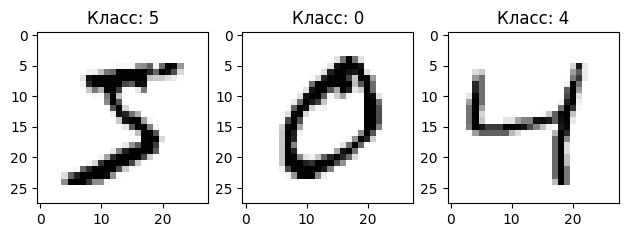

In [28]:
plt.figure(figsize=(7.5, 2.5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap="Greys")
    plt.title("Класс: %d"%y[i])

**Разобьем на обучающую и тестовую выборку**

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [30]:
train_dset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(),
                                            torch.from_numpy(y_train).long())
train_loader = torch.utils.data.DataLoader(train_dset,
                                            batch_size=BATCH_SIZE)

In [31]:
test_dset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(),
                                           torch.from_numpy(y_train).long())
test_loader = torch.utils.data.DataLoader(test_dset,
                                            batch_size=BATCH_SIZE)

**Представим нейросеть в виде class**

In [32]:
class FCN(nn.Module):
    def __init__(self, N_NEURONS1, N_NEURONS2, N_CLASSES):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], N_NEURONS1)
        self.fc2 = nn.Linear(N_NEURONS1, N_NEURONS2)
        self.fc3 = nn.Linear(N_NEURONS2, N_CLASSES)

    def forward(self, x):
        z1 = F.relu(self.fc1(x))
        z2 = F.relu(self.fc2(z1))
        z3 = self.fc3(z2)
        return z3

In [33]:
net = FCN(N_NEURONS1, N_NEURONS2, N_CLASSES)
mini_batch = torch.from_numpy(X[:3]).float()
net(mini_batch)

tensor([[  1.1585,  -0.4090,  11.1450,  -3.8625,   5.4581,  -9.6790,   5.9124,
          -0.1085,   1.2634,  -2.0326],
        [ -2.9234,  22.7193,   9.7122,   1.3867,  -1.5793, -12.4529,  11.3250,
           5.1978,   4.9698,   0.4000],
        [ -3.8918,   1.7322,   2.5821,   1.1348,   5.1695, -12.1370,  -2.0860,
           2.4953,   5.9109,   4.7884]], grad_fn=<AddmmBackward0>)

In [34]:
net.to(DEVICE) # перенос модели на GPU

FCN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [17]:
list(net.parameters()) # список параметров модели

**Выберем функцию потерь**

In [35]:
criterion = nn.CrossEntropyLoss() # операция softmax и кросс-энтропия вместе

**Используем оптимизатор Adam**

In [36]:
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)

**Обучение:**

In [37]:
total_step = len(train_loader)
for epoch in range(NUM_EPOCHS): # цикл по эпохам обучения
    for i, (images, labels) in enumerate(train_loader): # цикл по мини-батчам
        # Перенос обоих тензоров на GPU
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)

        # Проход вперед
        outputs = net(images)
        loss = criterion(outputs, labels)

        # Проход назад
        optimizer.zero_grad()
        loss.backward()

        # Обновление параметров нейросети
        optimizer.step()

        if (i+1) % 200 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, NUM_EPOCHS, i+1, total_step, loss.item()))

Epoch [1/10], Step [200/938], Loss: 0.7240
Epoch [1/10], Step [400/938], Loss: 0.5484
Epoch [1/10], Step [600/938], Loss: 0.5213
Epoch [1/10], Step [800/938], Loss: 0.2513
Epoch [2/10], Step [200/938], Loss: 0.2588
Epoch [2/10], Step [400/938], Loss: 0.3764
Epoch [2/10], Step [600/938], Loss: 0.3190
Epoch [2/10], Step [800/938], Loss: 0.0789
Epoch [3/10], Step [200/938], Loss: 0.1319
Epoch [3/10], Step [400/938], Loss: 0.2908
Epoch [3/10], Step [600/938], Loss: 0.2002
Epoch [3/10], Step [800/938], Loss: 0.0543
Epoch [4/10], Step [200/938], Loss: 0.0740
Epoch [4/10], Step [400/938], Loss: 0.2635
Epoch [4/10], Step [600/938], Loss: 0.1383
Epoch [4/10], Step [800/938], Loss: 0.0453
Epoch [5/10], Step [200/938], Loss: 0.0348
Epoch [5/10], Step [400/938], Loss: 0.2390
Epoch [5/10], Step [600/938], Loss: 0.0870
Epoch [5/10], Step [800/938], Loss: 0.0247
Epoch [6/10], Step [200/938], Loss: 0.0228
Epoch [6/10], Step [400/938], Loss: 0.2188
Epoch [6/10], Step [600/938], Loss: 0.0728
Epoch [6/10

In [38]:
net.eval()
with torch.no_grad(): # отключение построения графа вычислений (не нужен на этапе тестирования)
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = net(images)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

    print('Test accuracy:', 100 * correct / total)

Test accuracy: 99.18166666666667


**Теперь необходимо сохранить модель**

In [57]:
def save_full_model(model):
    torch.save(model, filepath)

model = net
filepath = '/content/my_model.pth'
save_full_model(model)

**Откроем сохраненную модель и протестируем ее**

In [58]:
def load_full_model(filepath):
    model = torch.load(filepath)  # Загружаем всю модель целиком
    print(f"Full model loaded from {filepath}")
    return model

filepath = '/content/my_model.pth'
model_fcn = load_full_model(filepath)

Full model loaded from /content/my_model.pth


<ipython-input-58-a270d001e814>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(filepath)  # Загружаем всю модель целиком


In [59]:
print(model_fcn)

FCN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


3


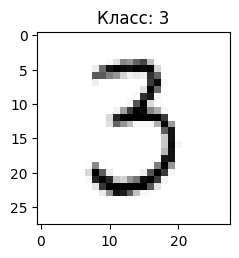

In [63]:
i = 50

image_tensor = torch.from_numpy(X[i]).float()
image_tensor = image_tensor.unsqueeze(0).to(DEVICE)

plt.figure(figsize=(7.5, 2.5))
plt.imshow(X[i].reshape(28, 28), cmap="Greys")
plt.title("Класс: %d"%y[i])

model_fcn.eval()  # Переводим модель в режим оценки
with torch.no_grad():  # Отключаем вычисление градиентов
    output = model_fcn(image_tensor)
    _, predicted_class = torch.max(output.data, 1)  # Получаем индекс класса с наибольшей вероятностью
    print(predicted_class.item())

**Урааааааа!!!!!! всё получилось**